# Analysis with Deep Neural Networks

In this botebook, I will analyze the data using the Deep Neural Networks.

## Load Libraries

In [27]:
#pip install tensorflow

In [39]:
# Import base libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

In [40]:
# Load Clean Data (no missing values)

df3 = pd.read_csv('data3_noMiss.csv')
df3.head()

,Attr1,Attr2,Attr3,Attr4,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,...,Attr50,Attr51,Attr55,Attr56,Attr57,Attr58,Attr59,Attr62,Attr63,class
0,0.174190,0.41299,0.14371,1.3480,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,...,1.3480,0.41299,127280.0,0.163960,0.375740,0.83604,0.000007,84.291,4.3303,0
1,0.146240,0.46038,0.28230,1.6294,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,...,1.5874,0.44849,3387.8,0.027516,0.271000,0.90108,0.000000,102.190,3.5716,0
2,0.000595,0.22612,0.48839,3.1599,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,...,3.1599,0.22612,20453.0,0.007639,0.000881,0.99236,0.000000,64.846,5.6287,0
3,0.024526,0.43236,0.27546,1.7833,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,...,1.4504,0.35164,5012.6,0.048398,0.043445,0.95160,0.142980,98.783,3.6950,0
4,0.188290,0.41504,0.34231,1.9279,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,...,1.7136,0.36891,13730.0,0.176480,0.321880,0.82635,0.073039,100.540,3.6303,0


## Pre-process

In [41]:
# Assign target and predictor
y = df3['class']
X = df3.drop('class', axis=1)

In [58]:
# Sepearate data into train and test splist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (8356, 48)
y_train shape =  (8356,)
X_test shape =  (2089, 48)
y_test shape =  (2089,)


In [62]:
# Scale/Normalize the predictor variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Convert to Dataframe
#X_train = pd.DataFrame(X_train, columns=X.columns)
#X_test = pd.DataFrame(X_test, columns=X.columns)
#X_train.head()

In [65]:
type(y_train)

numpy.ndarray

## Baseline Model - NN

In [236]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=(48,)))
#model_1.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(48,)))
model_1.add(Dense(20, activation='relu'))
#model_1.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model_1.add(Dense(1, activation='sigmoid'))

In [237]:
model_1.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['acc'])

In [238]:
history_1 = model_1.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=6684,
                    validation_split=0.20,
                    )

Train on 6684 samples, validate on 1672 samples
Epoch 1/50
6684/6684 [==============================] - 1s 156us/sample - loss: 0.7359 - acc: 0.3453 - val_loss: 0.7296 - val_acc: 0.3529
Epoch 2/50
6684/6684 [==============================] - 0s 19us/sample - loss: 0.7290 - acc: 0.3728 - val_loss: 0.7228 - val_acc: 0.3965
Epoch 3/50
6684/6684 [==============================] - 0s 20us/sample - loss: 0.7223 - acc: 0.4017 - val_loss: 0.7162 - val_acc: 0.4258
Epoch 4/50
6684/6684 [==============================] - 0s 21us/sample - loss: 0.7156 - acc: 0.4372 - val_loss: 0.7097 - val_acc: 0.4641
Epoch 5/50
6684/6684 [==============================] - 0s 20us/sample - loss: 0.7092 - acc: 0.4768 - val_loss: 0.7033 - val_acc: 0.5144
Epoch 6/50
6684/6684 [==============================] - 0s 20us/sample - loss: 0.7028 - acc: 0.5194 - val_loss: 0.6970 - val_acc: 0.5455
Epoch 7/50
6684/6684 [==============================] - 0s 20us/sample - loss: 0.6965 - acc: 0.5655 - val_loss: 0.6908 - val_acc:

In [239]:
y_train_pred = np.round(model_1.predict(X_train))
y_test_pred = np.round(model_1.predict(X_test))

print('Data 3\n')
print('Training Data:\n', classification_report(y_train, y_train_pred))
print('Testing Data:\n', classification_report(y_test, y_test_pred))

Data 3

Training Data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7961
           1       0.02      0.00      0.00       395

    accuracy                           0.95      8356
   macro avg       0.49      0.50      0.49      8356
weighted avg       0.91      0.95      0.93      8356

Testing Data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1993
           1       0.00      0.00      0.00        96

    accuracy                           0.94      2089
   macro avg       0.48      0.49      0.49      2089
weighted avg       0.91      0.94      0.93      2089



In [226]:
precision_score(y_test, y_test_pred)

0.0

In [233]:
def plot_acc_loss(history, data_number, model_title, x_min_acc=0.5, y_max_loss=1):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    ax1.plot(acc, label='train')
    ax1.plot(val_acc, label='validation')
    ax1.set_title(f"Accuracy for {model_title}", fontsize=14)
    ax1.set_xlabel('Epoch', fontsize=14)
    #ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy', fontsize=14)
    ax1.set_ylim([x_min_acc, 1.1])
    ax1.legend(fontsize=14)
    
    ax2.plot(loss, label='train')
    ax2.plot(val_loss, label='validation')
    ax2.set_title(f"Loss for {model_title}", fontsize=14)
    ax2.set_xlabel('Epoch', fontsize=14)
    #ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss', fontsize=14)
    ax2.set_ylim([0, y_max_loss])
    ax2.legend(fontsize=14)
    
    plt.savefig(f'figures/data{data_number}_{model_title}_acc_loss_plot.png')

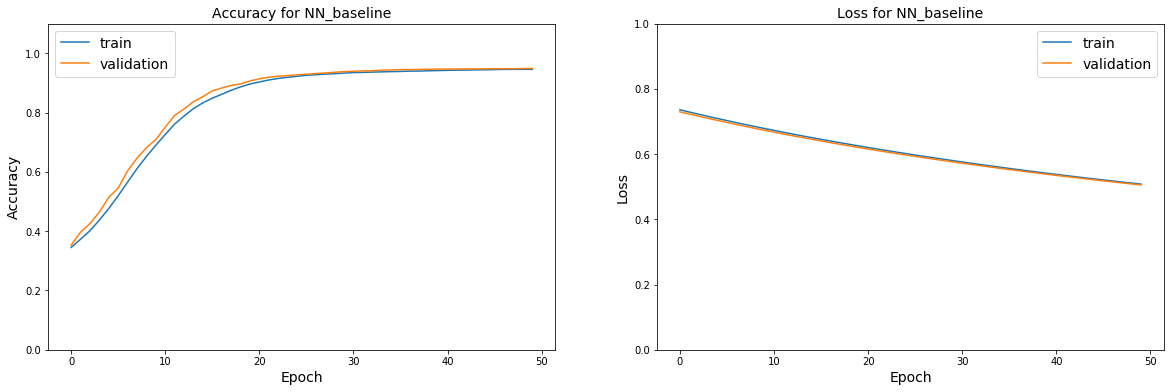

In [241]:
plot_acc_loss(history_1, 3, 'NN_baseline', 0)